In [4]:
#DATA ANALYTICS IN ACTION - PART A

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [5]:
#read the file path
DF=pd.read_excel('EconomicIndicators2020.xlsx')
DF

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.29,38.97
1,2,Albania,Europe,76.99,5343.04,933.42,2915.07,4383.20,NaN,2.84
2,3,Algeria,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.85,43.45
3,4,Angola,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.74,33.43
4,5,Antigua and Barbuda,North America,78.84,15284.77,29.88,30.34,474.60,830.34,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,70.33,1759.31,11541.68,14968.15,115577.80,120.50,34.23
173,174,Vietnam,Asia,75.38,3586.35,83004.91,43865.60,355323.10,166.23,96.65
174,175,West Bank and Gaza,Asia,74.40,3233.57,1715.80,1103.00,NaN,NaN,4.80
175,176,Zambia,Africa,62.38,956.83,1397.30,539.17,7607.10,53.75,18.93


In [6]:
#verifying all columns with missing value
print(DF.isnull().sum())
# Impute missing values with mean of the column
DF['CO2kt'].fillna(DF['CO2kt'].mean(), inplace=True)
DF['HealthPC$'].fillna(DF['HealthPC$'].mean(), inplace=True)
print(DF.isnull().sum())

No             0
Country        0
Continent      0
LifeExpect     0
GDPPC          0
MfgMn$         0
AgriMn$        0
CO2kt         10
HealthPC$     13
Pop_mn         0
dtype: int64
No            0
Country       0
Continent     0
LifeExpect    0
GDPPC         0
MfgMn$        0
AgriMn$       0
CO2kt         0
HealthPC$     0
Pop_mn        0
dtype: int64


In [7]:
#Q2] Hypothesis testing

import pandas as pd
from scipy import stats

# Extracting life expectancy data
life_expectancy_data = DF['LifeExpect']

# Expected Average Life Expectancy
expected_life_expectancy = 70

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(life_expectancy_data, expected_life_expectancy)

# Results
print("One-Sample T-Test Results:")
print(f"Null hypothesis: Expected average life expectancy = {expected_life_expectancy} years")
print(f"Sample mean life expectancy: {life_expectancy_data.mean()}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Significance at 99% confidence level
alpha = 0.01
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("The available evidence strongly indicates that the average life expectancy differs from 70 years.")
else:
    print("\nFail to reject the null hypothesis.")
    print("Insufficient evidence exists to indicate a difference in average life expectancy.")


One-Sample T-Test Results:
Null hypothesis: Expected average life expectancy = 70 years
Sample mean life expectancy: 72.67039548022599
T-statistic: 4.825784830727795
P-value: 3.0106331354163777e-06

Significance level (alpha): 0.01

Reject the null hypothesis.
The available evidence strongly indicates that the average life expectancy differs from 70 years.


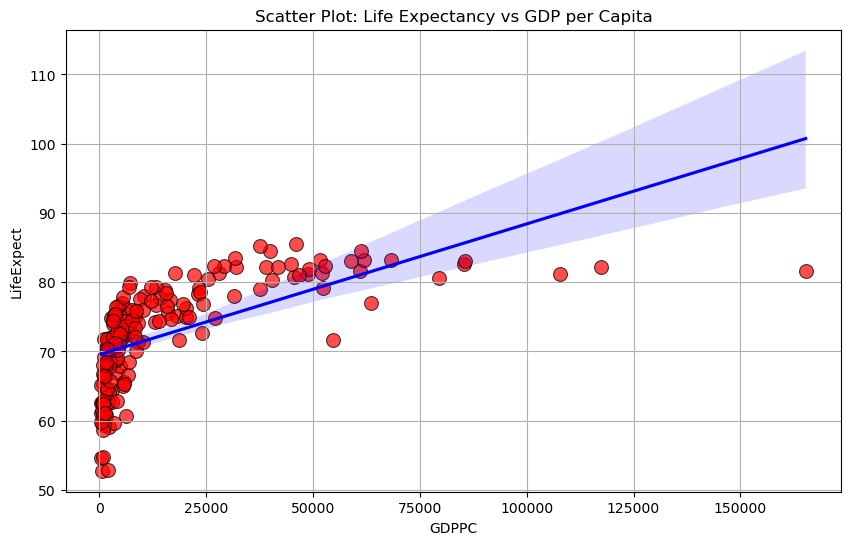

In [16]:
#Q3) Simple Regression
#Q3A) Relationship between Lifeexpectancy at birth and the GDP per capita of countries. 

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DF is your DataFrame with 'Life Expectancy' and 'GDP per Capita' columns
life_expectancy = DF['LifeExpect']
gdp_per_capita = DF['GDPPC']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x=gdp_per_capita, y=life_expectancy, s=100, alpha=0.7, color='red', edgecolor='black')
# 's' sets the size of markers, 'alpha' controls transparency, 'color' sets marker color, 'edgecolor' sets marker edge color

plt.title('Scatter Plot: Life Expectancy vs GDP per Capita')  # Setting the title
plt.xlabel('GDP per Capita')  # Setting the x-axis label
plt.ylabel('Life Expectancy')  # Setting the y-axis label
#Add regression line and confidence interval using seaborn's regplot
sns.regplot(x=gdp_per_capita, y=life_expectancy, scatter=False, color='blue')

plt.grid(True)  # Show gridlines

plt.show()  # Display the plot


In [9]:
#Q3B) Build a simple linear regression model between Life Expectancy and GDP per Capita

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

DF = DF.drop('No', axis = 1)
print(DF.head())

               Country      Continent  LifeExpect     GDPPC    MfgMn$  \
0          Afghanistan           Asia       62.58    516.87   1546.26   
1              Albania         Europe       76.99   5343.04    933.42   
2              Algeria         Africa       74.45   3354.16  27257.32   
3               Angola         Africa       62.26   1502.95   3548.57   
4  Antigua and Barbuda  North America       78.84  15284.77     29.88   

    AgriMn$      CO2kt    HealthPC$  Pop_mn  
0   5402.59    8709.47    80.290000   38.97  
1   2915.07    4383.20  1228.635427    2.84  
2  20089.32  161563.00   214.850000   43.45  
3   4997.28   19814.50    50.740000   33.43  
4     30.34     474.60   830.340000    0.09  


In [10]:
# Assuming DF is your DataFrame with 'Life Expectancy' and 'GDP per Capita' columns
X = DF['GDPPC']  # Independent variable
y = DF['LifeExpect']  # Dependent variable

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.56e-20
Time:                        15:23:11   Log-Likelihood:                -561.07
No. Observations:                 177   AIC:                             1126.
Df Residuals:                     175   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5382      0.529    131.555      0.0

In [14]:
#Q4) MULTIPLE REGRESSION MODEL

import statsmodels.api as sm

# Assuming DF is your DataFrame with relevant columns
X = DF[['GDPPC', 'HealthPC$', 'Pop_mn', 'CO2kt', 'MfgMn$', 'AgriMn$']]  # Independent variable
y = DF['LifeExpect']  # Dependent variable

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     23.13
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.23e-20
Time:                        15:25:35   Log-Likelihood:                -551.18
No. Observations:                 177   AIC:                             1116.
Df Residuals:                     170   BIC:                             1139.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1624      0.540    128.130      0.0